# FC Barcelona vs Real Madrid All Matches Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style="whitegrid")

# Load the dataset
df = pd.read_csv('matches.csv')
df.head()

,Competition,Matchday,Date,Home Team,Away Team,Attendance,Result,Winner
0,Supercopa,Final,"Sun, 11/01/2026",FC Barcelona,Real Madrid,60.326,3:2,FC Barcelona
1,LaLiga,10,"Sun, 26/10/2025",Real Madrid,FC Barcelona,78.107,2:1,Real Madrid
2,LaLiga,35,"Sun, 11/05/2025",FC Barcelona,Real Madrid,50.319,4:3,FC Barcelona
3,Copa del Rey,Final,"Sat, 26/04/2025",FC Barcelona,Real Madrid,65.080,3:2AET,FC Barcelona
4,Supercopa,Final,"Sun, 12/01/2025",Real Madrid,FC Barcelona,60.000,2:5,FC Barcelona


## 1. Overall Record

Overall Match Results:
Winner
Real Madrid     107
FC Barcelona    105
Draw             51
Name: count, dtype: int64


C:\Users\priya\AppData\Local\Temp\ipykernel_17632\4008764006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='viridis')


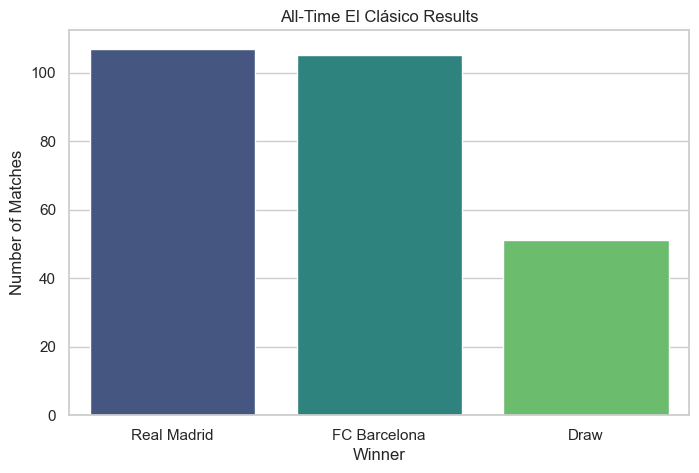

In [2]:
winner_counts = df['Winner'].value_counts()

print("Overall Match Results:")
print(winner_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='viridis')
plt.title('All-Time El Clásico Results')
plt.xlabel('Winner')
plt.ylabel('Number of Matches')
plt.show()

## 2. match results by competition

Wins by Competition:


Winner,Draw,FC Barcelona,Real Madrid
Competition,,,
Copa de la Liga (bis 1986),3,2,1
Copa del Rey,8,18,13
Europapokal der Landesmeister,1,1,2
LaLiga,35,76,80
Supercopa,2,7,10
UEFA Champions League,2,1,1


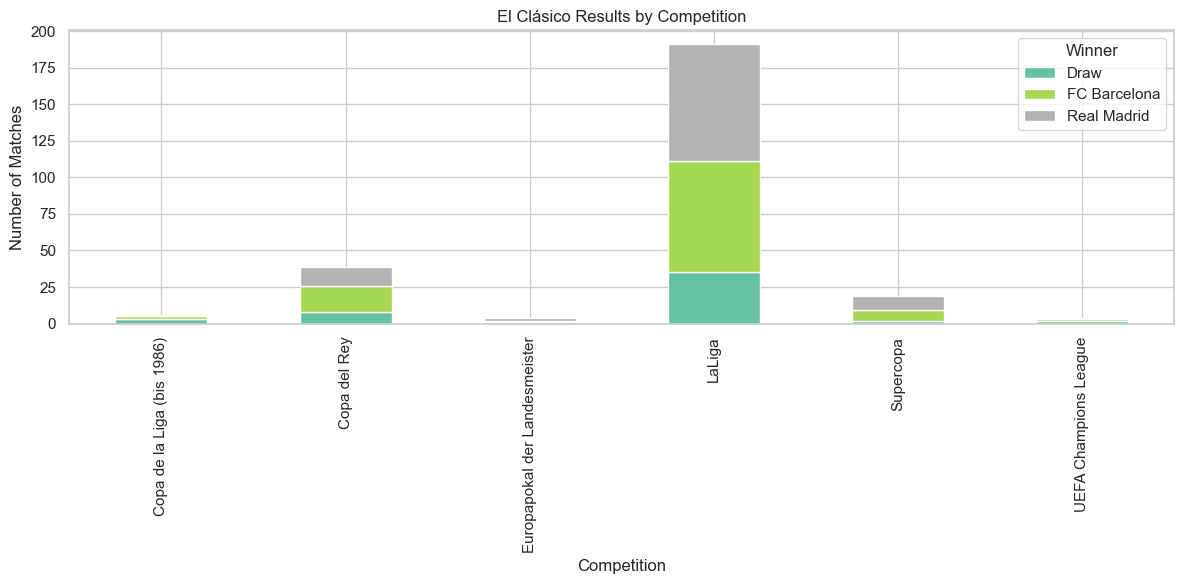

In [3]:
comp_stats = df.groupby(['Competition', 'Winner']).size().unstack(fill_value=0)

print("Wins by Competition:")
display(comp_stats)

comp_stats.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('El Clásico Results by Competition')
plt.xlabel('Competition')
plt.ylabel('Number of Matches')
plt.legend(title='Winner')
plt.tight_layout()
plt.show()

## 3. goals analysis

In [4]:
def extract_goals(result, home_team, away_team):
    try:
        # Clean string to ignore extra characters like 'AET' or 'on pens'
        score_part = str(result).split('AET')[0].split('on pens')[0].strip()
        home_goals, away_goals = map(int, score_part.split(':'))
        
        fcb_goals = home_goals if 'Barcelona' in str(home_team) else away_goals
        rma_goals = away_goals if 'Barcelona' in str(home_team) else home_goals
        
        return pd.Series([fcb_goals, rma_goals])
    except:
        return pd.Series([None, None])

df[['FCB_Goals', 'RMA_Goals']] = df.apply(
    lambda row: extract_goals(row['Result'], row['Home Team'], row['Away Team']), 
    axis=1
)

# Total goals scored over the years
total_fcb_goals = df['FCB_Goals'].sum()
total_rma_goals = df['RMA_Goals'].sum()

print(f"Total goals scored by FC Barcelona: {total_fcb_goals:.0f}")
print(f"Total goals scored by Real Madrid: {total_rma_goals:.0f}")

# Identifying the matches with the highest total goals
df['Total_Goals'] = df['FCB_Goals'] + df['RMA_Goals']
highest_scoring = df.sort_values(by='Total_Goals', ascending=False).head(5)

print("\nHighest Scoring Matches:")
display(highest_scoring[['Date', 'Competition', 'Home Team', 'Away Team', 'Result']])

Total goals scored by FC Barcelona: 439
Total goals scored by Real Madrid: 447

Highest Scoring Matches:


,Date,Competition,Home Team,Away Team,Result
229,"Sun, 13/06/1943",Copa del Rey,Real Madrid,CF Barcelona,11:1
259,"Thu, 13/04/1916",Copa del Rey,Madrid Foot-ball Club,FC Barcelona,6:6AET
243,"Sun, 03/02/1935",LaLiga,Madrid Foot-ball Club,FC Barcelona,8:2
231,"Sun, 10/01/1943",LaLiga,CF Barcelona,Real Madrid,5:5
214,"Sun, 24/09/1950",LaLiga,CF Barcelona,Real Madrid,7:2


## 4. attendance Analysis

Top 5 Highest Attendance Matches:


,Date,Competition,Home Team,Away Team,Result,Attendance
48,"Wed, 17/08/2011",Supercopa,FC Barcelona,Real Madrid,3:2,99.354
41,"Sun, 07/10/2012",LaLiga,FC Barcelona,Real Madrid,2:2,99.354
44,"Sat, 21/04/2012",LaLiga,FC Barcelona,Real Madrid,1:2,99.252
31,"Sat, 02/04/2016",LaLiga,FC Barcelona,Real Madrid,1:2,98.902
37,"Sat, 26/10/2013",LaLiga,FC Barcelona,Real Madrid,2:1,98.761


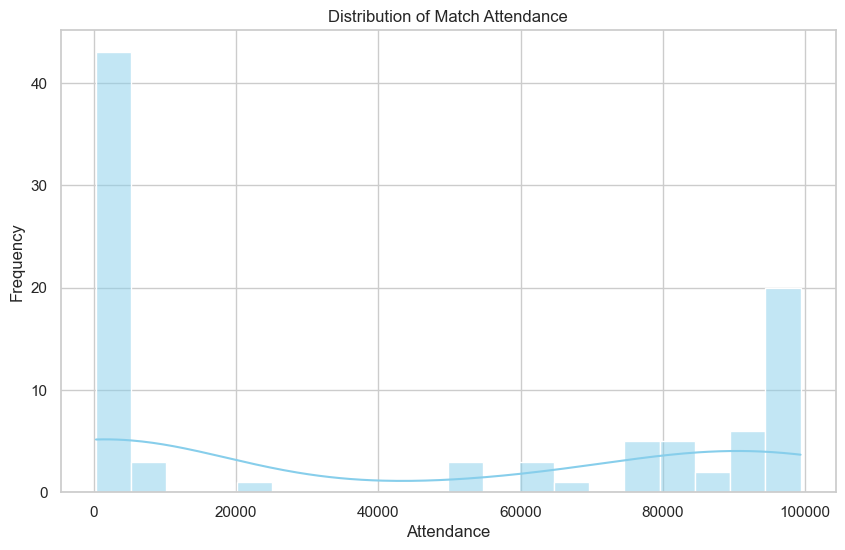

In [5]:
def clean_attendance(att):
    if pd.isna(att):
        return 0.0
    # Remove '.' (often used as thousand separator) and convert to float
    return float(str(att).replace('.', ''))

df['Attendance_Clean'] = df['Attendance'].apply(clean_attendance)

top_attendance = df[df['Attendance_Clean'] > 0].sort_values(by='Attendance_Clean', ascending=False).head(5)

print("Top 5 Highest Attendance Matches:")
display(top_attendance[['Date', 'Competition', 'Home Team', 'Away Team', 'Result', 'Attendance']])

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Attendance_Clean'] > 0]['Attendance_Clean'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Match Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()